## Is flying safer now than before? 

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

from flight_safety.queries import get_events_accidents

In [3]:
mpl.rcParams['figure.figsize'] = 10, 6

mpl.rcParams['font.size'] = 20

con = sqlite3.connect('data/avall.db')

events = get_events_accidents(con)

In [4]:
gby_year = events.groupby(events.ev_date.dt.year)

injured_per_year = gby_year[['inj_tot_f', 'inj_tot_s', 'inj_tot_m']].sum()

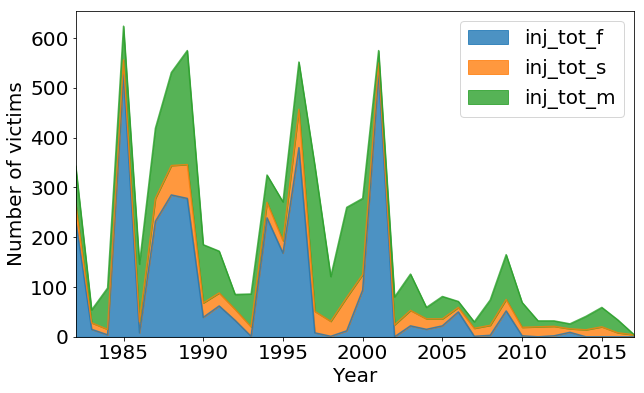

In [5]:
injured_per_year.plot.area(alpha=0.8)
plt.xlabel('Year')
plt.ylabel('Number of victims');

In [6]:
passengers = pd.read_csv('./data/annual_passengers_carried_data.csv', nrows=1, usecols=range(4,60))
passengers = passengers.transpose()
# renaming column
passengers.columns = ['passengers']
gby_year = events.groupby(events.ev_date.dt.year)

injured_per_year = gby_year[['inj_tot_f', 'inj_tot_s', 'inj_tot_m']].sum()

injured_per_year.tail()
# parsing date in index 
passengers.index = pd.to_datetime(passengers.index.str[:4])
# converting flight number to number
passengers['passengers'] = pd.to_numeric(passengers['passengers'], errors='coerce') / 1e6
passengers.index = passengers.index.year

In [7]:
flights = pd.read_csv('data/API_IS.AIR.DPRT_DS2_en_csv_v2/API_IS.AIR.DPRT_DS2_en_csv_v2.csv', skiprows=4)
flights = flights[flights['Country Name'] == 'United States']

flights = flights.iloc[:, 5:-1].T
flights.index = pd.to_numeric(flights.index)
flights = flights / 1e6

flights.columns = ['flights']

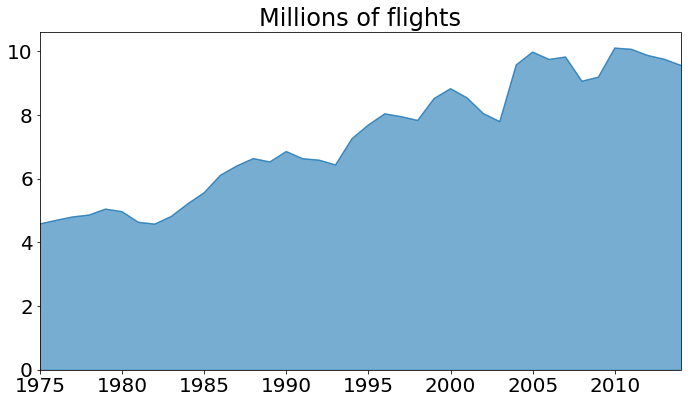

In [8]:
fig, ax = plt.subplots(1, 1)
# ax[0].set_title('Millions of passengers transported')
# passengers['passengers'].plot.area(ax=ax[0], alpha=0.6, color="#0072B2")
# ax[0].set_xlim(1975, 2014)

ax.set_title('Millions of flights')
flights.plot.area(ax=ax, alpha=0.6, legend=False)
ax.set_xlim(1975, 2014)

plt.tight_layout()

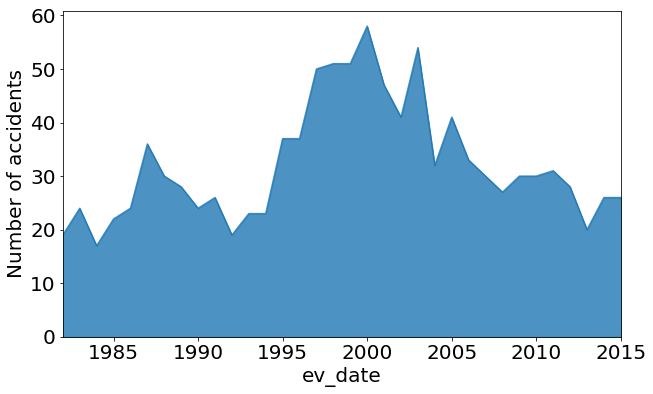

In [9]:
accidents_gby_year = events.groupby(events.ev_date.dt.year).ntsb_no.count()
ax = accidents_gby_year.plot.area(alpha=0.8,)
ax.set_xlim(1982, 2015)

ax.set_ylabel('Number of accidents');

In [10]:
accident_rate = accidents_gby_year / flights.flights
accident_rate.tail()

2013    2.052230
2014    2.720711
2015    2.737860
2016    1.661170
2017         NaN
dtype: float64

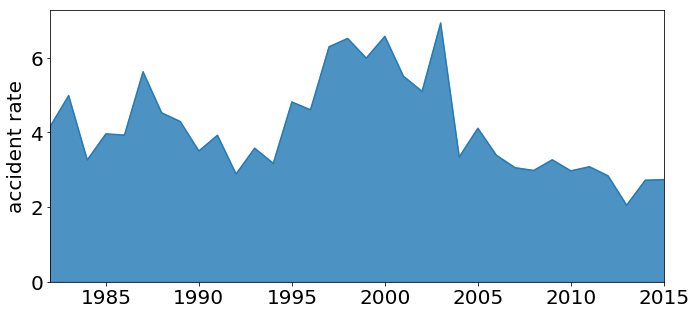

In [11]:
ax = accident_rate.plot.area(alpha=0.8, figsize=(11,5))
ax.set_xlim(1982, 2015)
ax.set_ylabel('accident rate');

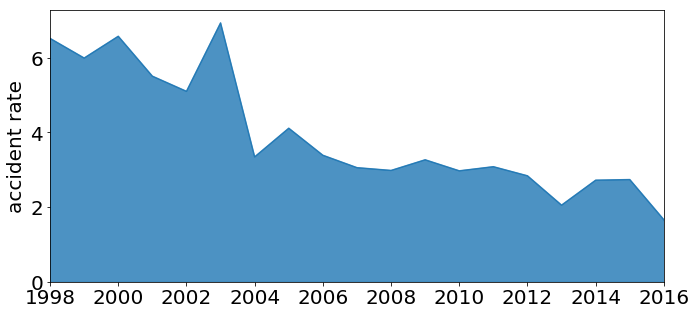

In [12]:
ax = accident_rate.plot.area(alpha=0.8, figsize=(11,5))
ax.set_xlim(1998, 2016)
ax.set_ylabel('accident rate');

## Official global numbers

According to [EASA](https://www.easa.europa.eu/) in 2016:
* Airline fatal accident rate: ~0.6 fatal accidentes / 1 Million flights
* Airline non-fatal accident rate: ~4.4 non-fatal accidents / 1 Million flights

https://www.easa.europa.eu/system/files/dfu/209735_EASA_ASR_MAIN_REPORT_2.0.pdf

## What can be done to keep improving? 

<center><img src="images/data4safety.png" width=500px></center>

Collecting and gathering all data that may support the management of safety risks
  - safety reports
  - flight data (i.e. data generated by the aircraft via the Flight Data Recorders)
  - surveillance data (air traffic data),
  - weather data
  - ...